This is to test the sensor component

In [1]:
import Comm 
from Models import dataProcess
import exeAreas
import Service
# import DTservice
import GlOb
import time
from API import srcAPI as src
from API import sinkAPI as sink
from API import PythonAPI
from API.comm_protos.TCP import TCPServer as Server
import os


In [2]:

# Start server
ports = [55000,55001,60001,60002,60000,60003,60004]
server = Server(ports=ports)
server.start_server()

Server is running on port 55000.
Listening on port 55000...
Server is running on port 55001.
Listening on port 55001...
Server is running on port 60001.
Listening on port 60001...
Server is running on port 60002.
Listening on port 60002...
Server is running on port 60000.
Listening on port 60000...
Server is running on port 60003.
Listening on port 60003...
Server is running on port 60004.
Listening on port 60004...


Connection from ('127.0.0.1', 50243) on port 60000
Connection from ('127.0.0.1', 50247) on port 60001
Connection from ('127.0.0.1', 50248) on port 60002
Connection from ('127.0.0.1', 50244) on port 60000


In [3]:
#create interfaces

##############sensor inteface
sens = src.Sensor(name  = 'tilt', config = {"type" : "freq", 'unit': 's', 'occurrences_per_unit':1},
                    sending_port = 55000, receiving_ports = [55001], 
                    outputsNames = ['temperature'])
sensName = 'Tilt_sens'
sens.save_to_csv(file_name=sensName)

############### Sink interface
monitor = sink.Sink (comm_proto = 'TCP-IP', 
                    name  = 'monitor', config = {"type" : "freq", "unit": "s", "occurrences_per_unit":1},
                    instruction_port = 60000, sending_ports=[60001], 
                    inputsNames = ['temperature'])
sinkName =  "Tilt_monitor"
monitor.save_to_csv(file_name=sinkName)

################### Data Process unit interface
directory = os.getcwd() + '\\' + 'Models'
DatProcc = dataProcess.TempSens()
DataProc = PythonAPI.pythonEncap(model = DatProcc,directory=directory,
                                 modelName = 'DPTempSens', typ = 'DataProc',
                                 inputsNames= ['rawTemp'], outputsNames= ['temp'])
DP_name = 'DPTempSens'
DataProc.save_to_csv(file_name=DP_name)

Data of the class has been extracted
For type DataProc the complete execution will be performed only by a method called: processData 
no parameters
Inputs and outputs have been defined for this model


In [4]:
#generate component: sensor, dataprocessing and sink

#sensor component 
output = {'name':"temperature", 'unit':'C', 'datatype':'JSON','val':''}
outputs = [output]

Tilt_sens = Comm.Source(name = 'Tilt_sens',outputs = outputs)

# sink component
input = {'name':"temperature", 'unit':'C', 'datatype':'float','val':''}
inputs = [input]

monitor_sink =  Comm.Sink(name='Tilt_monitor',inputs=inputs)

# Data process component 
directory = os.getcwd() + '\\' + 'Models'

input = {'name':"rawTemp", 'unit':'C', 'datatype':'JSON','val':''}
inputs = [input]
output = {'name':"temp", 'unit':'C', 'datatype':'JSON','val':''}
outputs = [output]

dataprocess1 = Comm.Model(name='DPTempSens',SimE='Python',modelDir=directory, 
                          inputs=inputs,outputs=outputs, parameters=[])

The variables defined are connsistent with the sensor component Tilt_sens
The variables defined are connsistent with the sink component Tilt_monitor
Data of the class has been extracted
For type DataProc the complete execution will be performed only by a method called: processData 
no parameters
Inputs and outputs have been defined for this model


In [5]:
#connect components
connections = exeAreas.ConnectionHandler()
#source outputs
srcin1 = {'component':Tilt_sens,'output':'temperature'}
#dtaprocess inputs
dtin1 = {'component':dataprocess1,'input':'rawTemp'}
#dataprocess outputs
dtout1 = {'component':dataprocess1,'output':'temp'}
# sink inputs
sinkin1 = {'component':monitor_sink,'input':'temperature'}

connections.connect(source=srcin1,destination=dtin1)
connections.connect(source=dtout1,destination=sinkin1)

Defult triggers will be used, no triggers as input
*******************************************************************
DONT FORGET TO INCLUDE MANUALLY THE UNIQUE OBJECT OF THE APPLICATION CLOCK AND RE-RUN OBJ_GEN
******************************************************************
*******************************************************************
DONT FORGET TO INCLUDE MANUALLY THE UNIQUE OBJECT OF THE APPLICATION CLOCK AND RE-RUN OBJ_GEN
******************************************************************


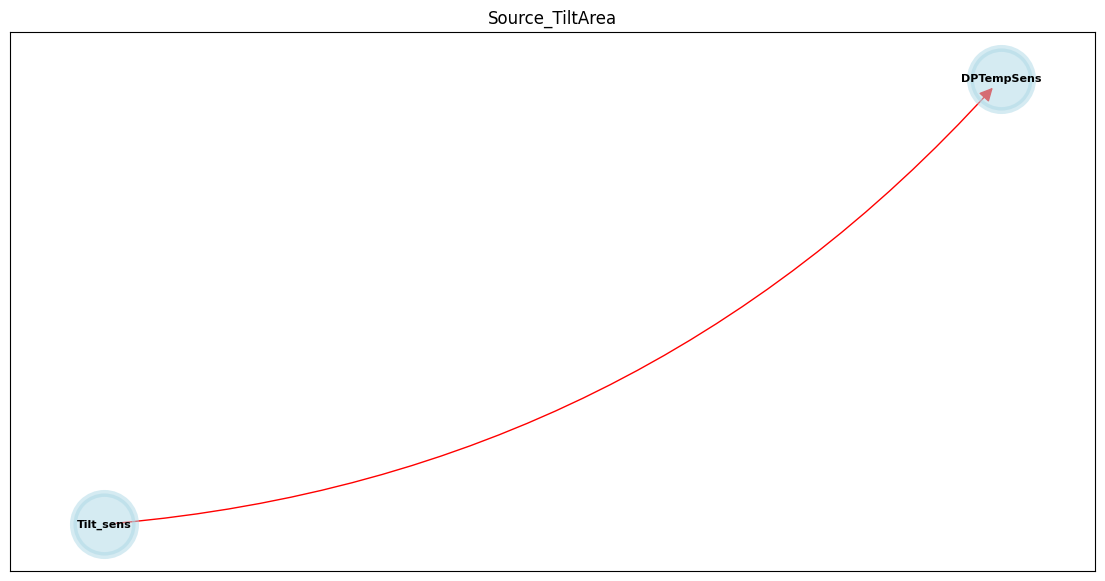

Defult triggers will be used, no triggers as input
*******************************************************************
DONT FORGET TO INCLUDE MANUALLY THE UNIQUE OBJECT OF THE APPLICATION CLOCK AND RE-RUN OBJ_GEN
******************************************************************
*******************************************************************
DONT FORGET TO INCLUDE MANUALLY THE UNIQUE OBJECT OF THE APPLICATION CLOCK AND RE-RUN OBJ_GEN
******************************************************************


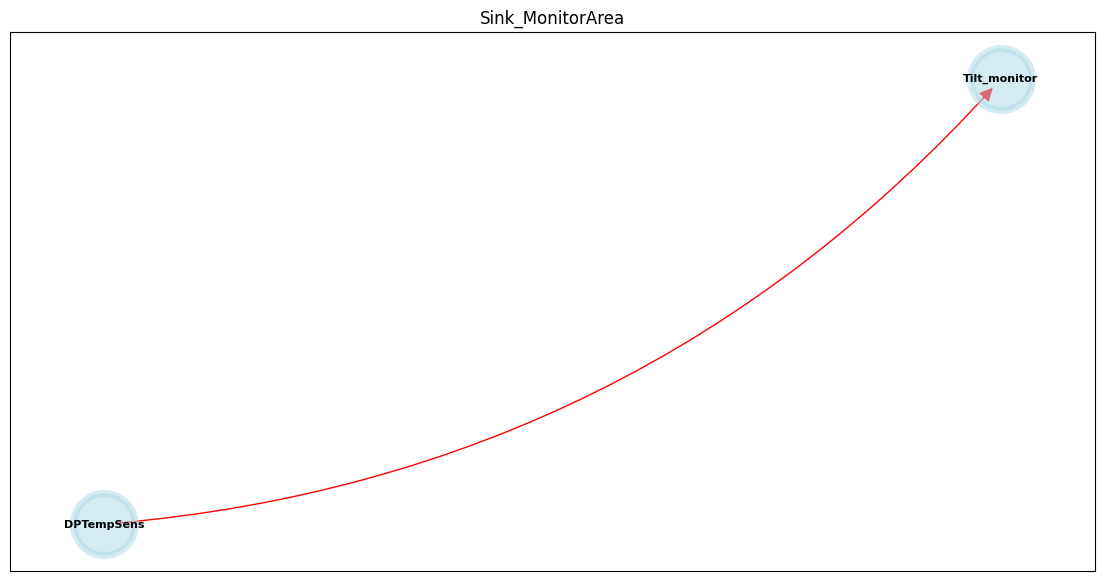

In [6]:
globals = GlOb.GlobalVars()
allComponents = [Tilt_sens,dataprocess1,monitor_sink,globals]
#area components
srcAreaComp =  [Tilt_sens,dataprocess1]
srcAreatrig =[]

dstAreaComp = [monitor_sink]
dstAreatrig = []

srcArea = exeAreas.srcExe(name = 'TiltArea',components=srcAreaComp, exec_type='time_specific',
                          triggers=srcAreatrig,allComponents=allComponents,delayTime=5)

dstArea = exeAreas.sinkExe(name = 'MonitorArea',components=dstAreaComp, exec_type='streaming',
                          triggers=dstAreatrig,allComponents=allComponents, delayTime=7)

In [ ]:
# Start server
ports = [55000,55001,60001,60002,60000,60003,60004]
server = Server(ports=ports)
server.start_server()

In [7]:
# monitor_sink.inputs
# monitor.client
dstArea.initialize()

Connected to server on send port 60001.
Connection from ('127.0.0.1', 50263) on port 60001
Connected to server on send port 60000.
Connection from ('127.0.0.1', 50264) on port 60000
Connection from ('127.0.0.1', 50265) on port 60000
Connected to server on receive port 60000.


In [8]:
port = monitor_sink.interfaceObj.instruction_port
print(port)
print(type(port))

60000
<class 'int'>


In [9]:
monitor_sink.controller(command = 'start')



{"command": "start"}
{"command": "start"}
{"command": "start"}
<class 'str'>
Message sent on port 60000: {"command": "start"}
Sensor Tilt_monitor has been activated and functioning
Message received on port 60000: {"command": "start"}


In [12]:
monitor_sink.inputs
for id, input in monitor_sink.inputs.items():
    print(input['value'])
    input['value'] = 20

print(monitor_sink.inputs)


{'input0_Sink1': {'name': 'temperature', 'value': 20}}


In [13]:
monitor_sink.push_data(testMode='on')

TypeError: Component.input_update() got an unexpected keyword argument 'client'

In [6]:
# srcArea.initialize()
# dstArea.initialize()
execAreas = [srcArea,dstArea]
DT = Service.ExeManager(exeAreas=execAreas)

In [ ]:
DT.initAreas()

In [ ]:
DT.startExe()
time.sleep(20)
globals.stopApp = True

In [ ]:
# import threading
# srcexecution = threading.Thread(target=srcArea.execute(), daemon=True)
# srcexecution.start()
print(DT.threads)
